In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import plotly.express as px
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [32]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [34]:
#  boş sutunları kontrol etme
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [35]:
#her sutunda kaç farklı değeri sorgulama
dataset.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

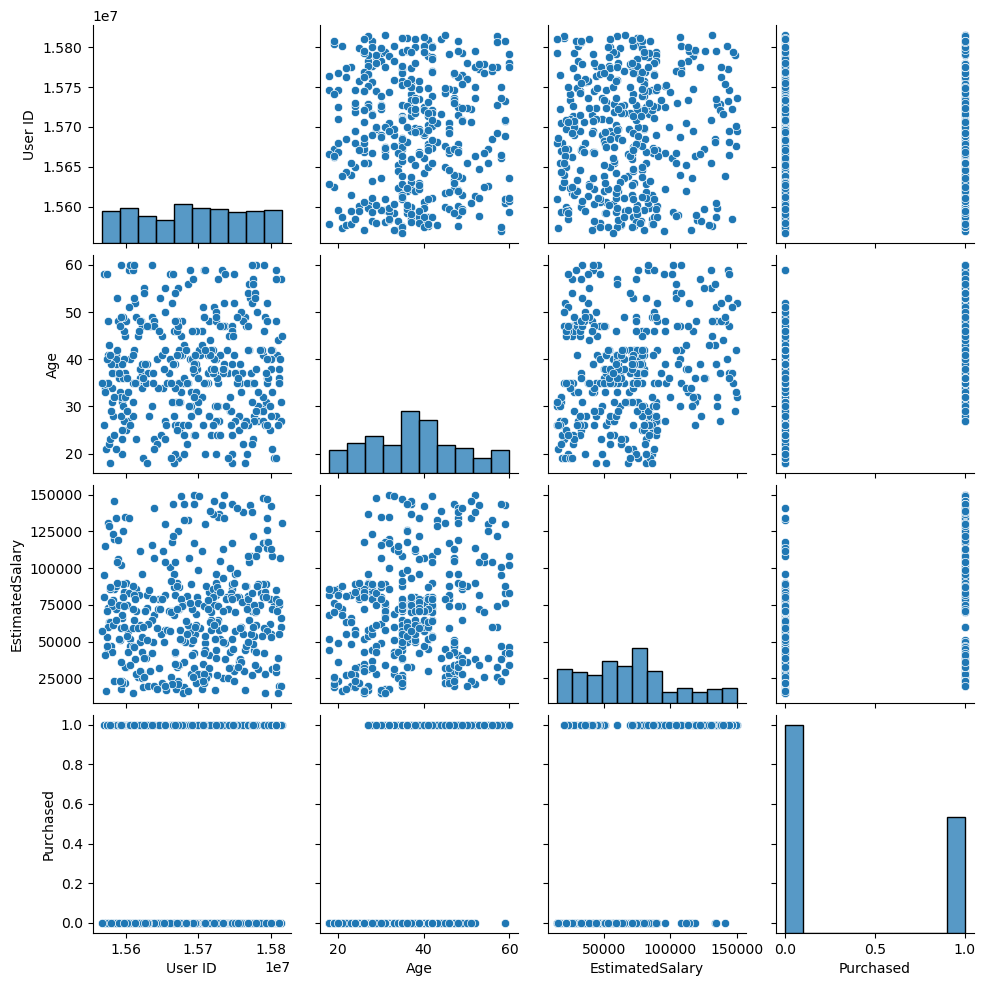

In [36]:
sns.pairplot(dataset)

<Figure size 2200x1400 with 0 Axes>

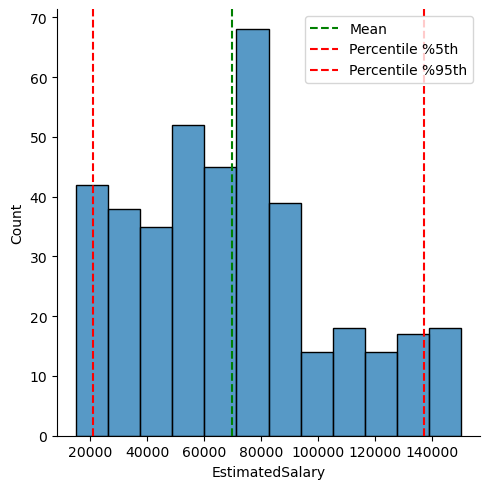

In [37]:
plt.figure(figsize=(22,14))

sns.displot(dataset['EstimatedSalary'])

# %5  %95 outlier red lines
plt.axvline(x=np.mean(dataset['EstimatedSalary']),c='green',ls='--',label='Mean')
plt.axvline(x=np.percentile(dataset['EstimatedSalary'],5),c='red',ls='--',label='Percentile %5th')
plt.axvline(x=np.percentile(dataset['EstimatedSalary'],95),c='red',ls='--',label='Percentile %95th')

plt.legend()
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

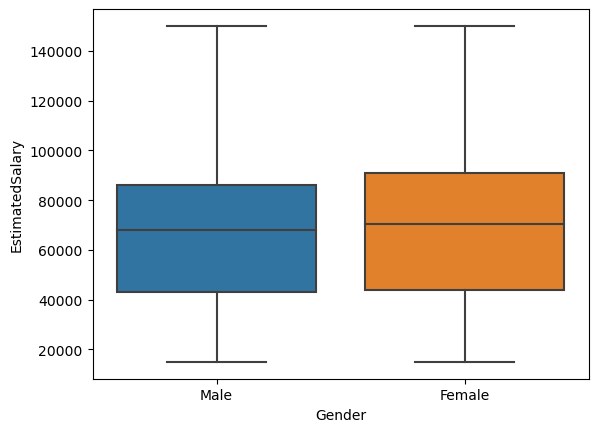

In [38]:
sns.boxplot(data = dataset, x = 'Gender', y = 'EstimatedSalary')

In [39]:
#Convert to categorical 


def MaletoOne(x):
    if x=="Male":
        return 1
    
    else:
        return 0
    
dataset["Gender"]=dataset["Gender"].apply(MaletoOne)

dataset.tail(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
398,15755018,1,36,33000,0
399,15594041,0,49,36000,1


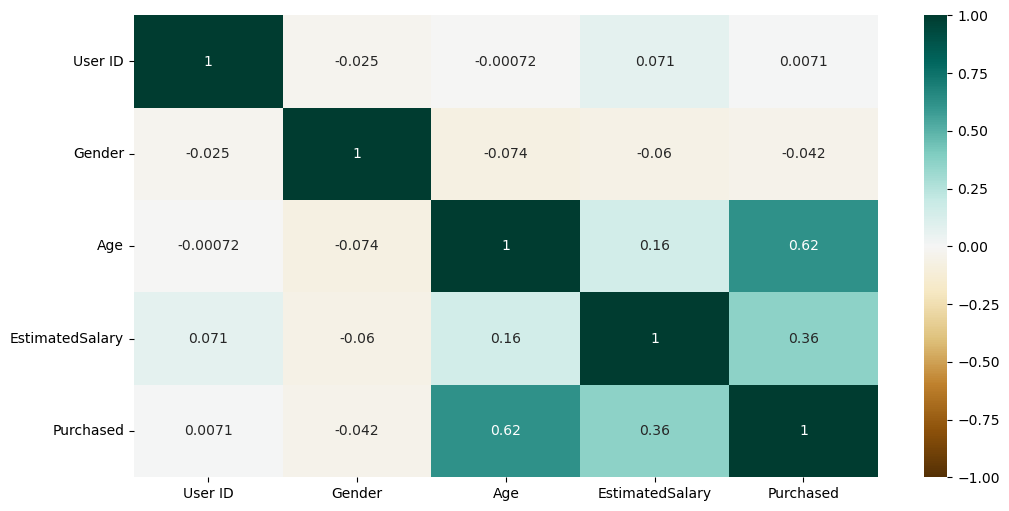

In [40]:
def Corr(data):
    plt.figure(figsize=(12,6))
    heatmap=sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap="BrBG")
    plt.show()

Corr(dataset)

In [41]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [43]:
#Verileri Scale etme

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0) #Farklı kerneller denenecektir.
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [46]:
y_pred = classifier.predict(X_test)


In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


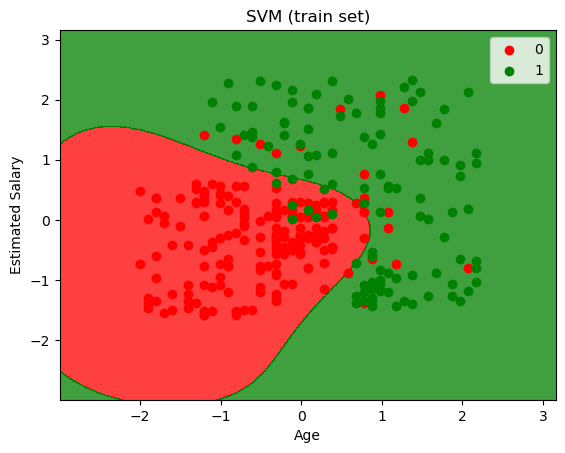

In [48]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('SVM (train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


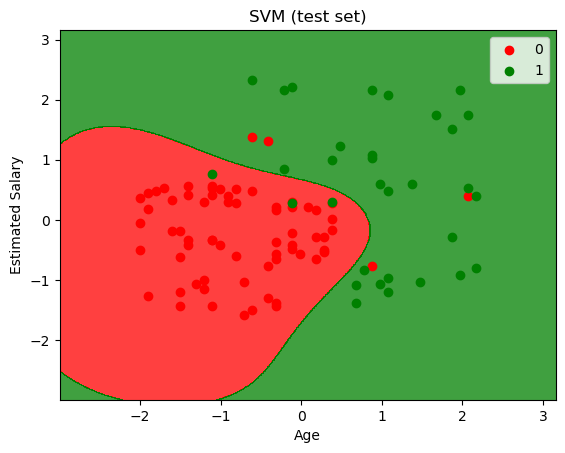

In [49]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('SVM (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()